In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [ ]:
myfile = requests.get('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
open('data', 'wb').write(myfile.content)
confirmed_global_df = pd.read_csv('data')
confirmed_global_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22,4/26/22,4/27/22,4/28/22,4/29/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,178574,178611,178638,178648,178689,178745,178769,178809,178850,178873
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,274606,274606,274737,274791,274828,274828,274862,274929,275002,275055
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265746,265754,265761,265761,265767,265771,265772,265773,265776,265779
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,41013,41013,41013,41013,41013,41013,41013,41013,41349,41349
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,656876,656876,656876,656876,656876,656876,657060,657060,657060,657060
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11818,11818,11818,11818,11818,11818,11818,11818,11818,11818
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,318640,318984,318984,318984,318984,319316,319431,319431,319594,319594


In [ ]:
country = input('Name of the country: ')

Name of the country: India


In [ ]:
country

'India'

In [ ]:
confirmedDf = confirmed_global_df[confirmed_global_df['Country/Region'] == country].reset_index(drop=True)
confirmedDf

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22,4/26/22,4/27/22,4/28/22,4/29/22
0,NaN,India,20.593684,78.96288,0,0,0,0,0,0,...,43049974,43052425,43054952,43057545,43060086,43060097,43065496,43068799,43072176,43072176


In [ ]:
df = confirmedDf.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=confirmed_global_df.columns[4:], var_name='Date', value_name='ConfirmedCases')
df2 = df.groupby(["Date", "Country/Region"])[['Date', 'Country/Region', 'ConfirmedCases']].sum().reset_index()
df2.columns = ['Date', 'Country', 'Confirmed']

In [ ]:
df2

,Date,Country,Confirmed
0,1/1/21,India,10305788
1,1/1/22,India,34889132
2,1/10/21,India,10466595
3,1/10/22,India,35875790
4,1/11/21,India,10479179
...,...,...,...
824,9/7/21,India,33096718
825,9/8/20,India,4370128
826,9/8/21,India,33139981
827,9/9/20,India,4465863


In [ ]:
df2.drop(['Country'], axis=1, inplace=True)

In [ ]:
df2

,Date,Confirmed
0,1/1/21,10305788
1,1/1/22,34889132
2,1/10/21,10466595
3,1/10/22,35875790
4,1/11/21,10479179
...,...,...
824,9/7/21,33096718
825,9/8/20,4370128
826,9/8/21,33139981
827,9/9/20,4465863


In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2.sort_values(by=['Date'], inplace=True)
df2.set_index('Date', inplace=True)
df2

,Confirmed
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2022-04-25,43060097
2022-04-26,43065496
2022-04-27,43068799


In [ ]:
confirmed = []
confirmed.append(df2['Confirmed'][0])

for i in range(1, len(df2)):
  confirmed.append(df2['Confirmed'][i] - df2['Confirmed'][i-1])

confirmed

df2['confirmed'] = confirmed

In [ ]:
df2

,Confirmed,confirmed
Date,,
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0
...,...,...
2022-04-25,43060097,11
2022-04-26,43065496,5399
2022-04-27,43068799,3303


In [ ]:
df2.drop(['Confirmed'], axis=1, inplace=True)
df2

,confirmed
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2022-04-25,11
2022-04-26,5399
2022-04-27,3303


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
.8 * len(df2)

663.2

In [ ]:
split_point = 663
y_train = df2[:split_point]
y_test = df2[split_point:]

len(df2) - split_point

166

In [ ]:
scaler.fit(df2)
scaled_train = scaler.fit_transform(y_train)
scaled_test = scaler.fit_transform(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 166
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 166, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 166, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 166, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 166, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 166, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 166, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 166, 50)           2

In [ ]:
model.fit(generator, epochs=3, batch_size=4)

Epoch 1/3
497/497 [==============================] - 140s 263ms/step - loss: 0.0207
Epoch 2/3
497/497 [==============================] - 132s 265ms/step - loss: 0.0073
Epoch 3/3
497/497 [==============================] - 131s 264ms/step - loss: 0.0104


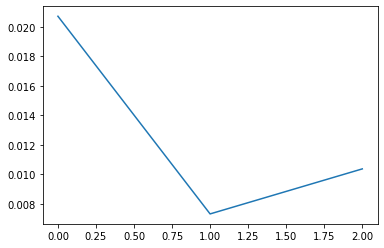

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(y_test.shape[0]):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
y_test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.metrics import mean_squared_error as mse
np.sqrt(mse(y_test['confirmed'], y_test['Predictions']))

91747.04207527603

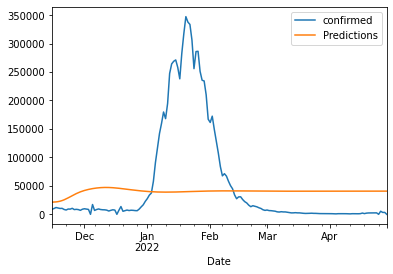

In [ ]:
y_test.plot()